# Tyre Data Analysis

#### Goal: analyze all races, lap times (via results/fastest laps), pit stops, and all tyre manufacturers.

## Import data and Modules

In [51]:
conda install psycopg2

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [52]:
from numpy.ma.extras import unique
import matplotlib.pyplot as plt


import pandas as pd
import seaborn as sns

In [53]:
path = 'resources/pickled_tables/'
extension = '.plk'

tire_data_table = "tyre_manufacturer"
tyre_data_file = path + tire_data_table + extension  
tire_data = pd.read_pickle(tyre_data_file)

print(f"Loaded data shape: {tire_data.shape}")
tire_data.head()


Loaded data shape: (9, 13)


,id,name,country_id,best_starting_grid_position,best_race_result,total_race_entries,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_podium_races,total_pole_positions,total_fastest_laps
0,avon,Avon,united-kingdom,2,5,32,28,0,2961,0,0,0,0
1,bridgestone,Bridgestone,japan,1,1,244,244,175,173435,482,209,168,170
2,continental,Continental,germany,1,1,13,13,10,2232,18,11,8,9
3,dunlop,Dunlop,united-kingdom,1,1,177,175,84,84697,241,104,77,83
4,englebert,Englebert,belgium,1,1,60,60,8,11015,40,26,11,12


In [54]:
tire_data.head(100)

,id,name,country_id,best_starting_grid_position,best_race_result,total_race_entries,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_podium_races,total_pole_positions,total_fastest_laps
0,avon,Avon,united-kingdom,2,5,32,28,0,2961,0,0,0,0
1,bridgestone,Bridgestone,japan,1,1,244,244,175,173435,482,209,168,170
2,continental,Continental,germany,1,1,13,13,10,2232,18,11,8,9
3,dunlop,Dunlop,united-kingdom,1,1,177,175,84,84697,241,104,77,83
4,englebert,Englebert,belgium,1,1,60,60,8,11015,40,26,11,12
5,firestone,Firestone,united-states-of-america,1,1,122,122,48,96610,138,77,59,52
6,goodyear,Goodyear,united-states-of-america,1,1,493,493,368,376316,1139,459,358,364
7,michelin,Michelin,france,1,1,217,215,102,99137,317,179,111,108
8,pirelli,Pirelli,italy,1,1,509,504,348,398748,1053,374,351,361


## Show basic stats

In [56]:
print(f"Number of tyre manufacturers: {len(tire_data)}")

Number of tyre manufacturers: 9


## Sort by total wins to see the best manufacturers

In [58]:
sorted_by_wins = tire_data.sort_values('total_race_wins', ascending=False)
print("\nTyre Manufacturers sorted by total wins:")
print(sorted_by_wins[['name', 'total_race_wins', 'total_race_entries']].head(10))


Tyre Manufacturers sorted by total wins:
          name  total_race_wins  total_race_entries
6     Goodyear              368                 493
8      Pirelli              348                 509
1  Bridgestone              175                 244
7     Michelin              102                 217
3       Dunlop               84                 177
5    Firestone               48                 122
2  Continental               10                  13
4    Englebert                8                  60
0         Avon                0                  32


## Calculate win percentage

In [60]:
tire_data['win_percentage'] = (tire_data['total_race_wins'] / tire_data['total_race_entries'] * 100)
sorted_by_win_percentage = tire_data.sort_values('win_percentage', ascending=False)
print("\nTyre Manufacturers sorted by win percentage:")
print(sorted_by_win_percentage[['name', 'win_percentage', 'total_race_wins', 'total_race_entries']].head(10))


Tyre Manufacturers sorted by win percentage:
          name  win_percentage  total_race_wins  total_race_entries
2  Continental       76.923077               10                  13
6     Goodyear       74.645030              368                 493
1  Bridgestone       71.721311              175                 244
8      Pirelli       68.369352              348                 509
3       Dunlop       47.457627               84                 177
7     Michelin       47.004608              102                 217
5    Firestone       39.344262               48                 122
4    Englebert       13.333333                8                  60
0         Avon        0.000000                0                  32


## Sort by total races

In [62]:
sorted_by_races = tire_data.sort_values('total_race_entries', ascending=False)
print("\nTyre Manufacturers sorted by total race entries:")
print(sorted_by_races[['name', 'total_race_entries', 'total_race_wins']].head(10))


Tyre Manufacturers sorted by total race entries:
          name  total_race_entries  total_race_wins
8      Pirelli                 509              348
6     Goodyear                 493              368
1  Bridgestone                 244              175
7     Michelin                 217              102
3       Dunlop                 177               84
5    Firestone                 122               48
4    Englebert                  60                8
0         Avon                  32                0
2  Continental                  13               10


# Simple Visualization 1: Total Wins Comparison

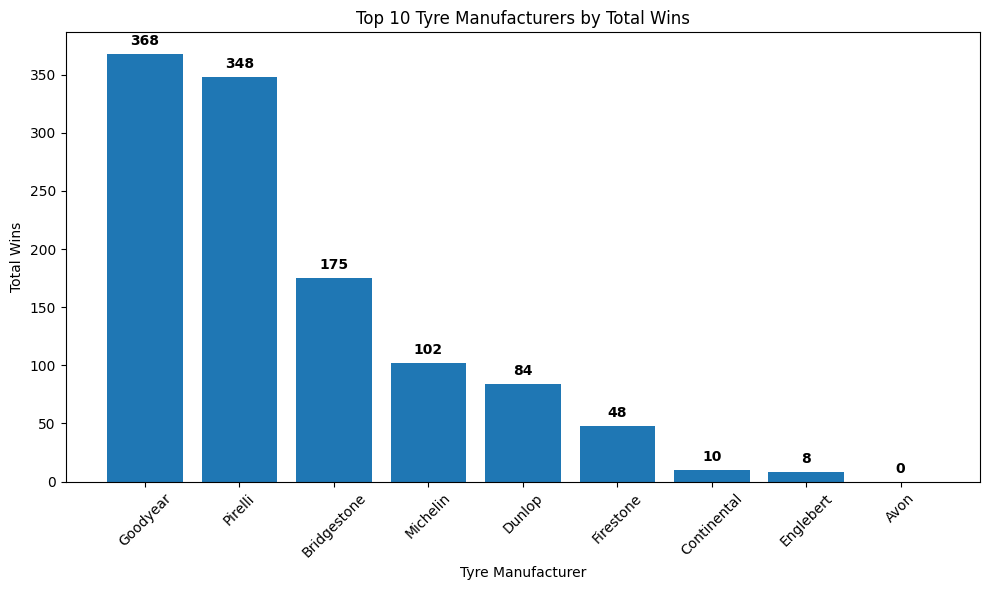

In [64]:
# Set figure size (similar to Ch9 plotting examples)
plt.figure(figsize=(10, 6))

# Get top 10 using nlargest() method from Chapter 8 slides
top_10_wins = sorted_by_wins.nlargest(10, 'total_race_wins')

# Create bar plot (similar to Ch8 plotting examples)
bars = plt.bar(top_10_wins['name'], top_10_wins['total_race_wins'])

# Set titles and labels (similar to Ch9 plot customization)
plt.title('Top 10 Tyre Manufacturers by Total Wins')
plt.xlabel('Tyre Manufacturer')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)  # Rotate x-axis labels like in Ch9 examples

# Add value labels on bars (enhanced version with formatting)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height):,}',  # Format with commas for thousands
             ha='center', va='bottom', fontweight='bold')

# Adjust layout and show (standard pattern from slides)
plt.tight_layout()
plt.show()

# Simple Visualization 2: Win Percentage

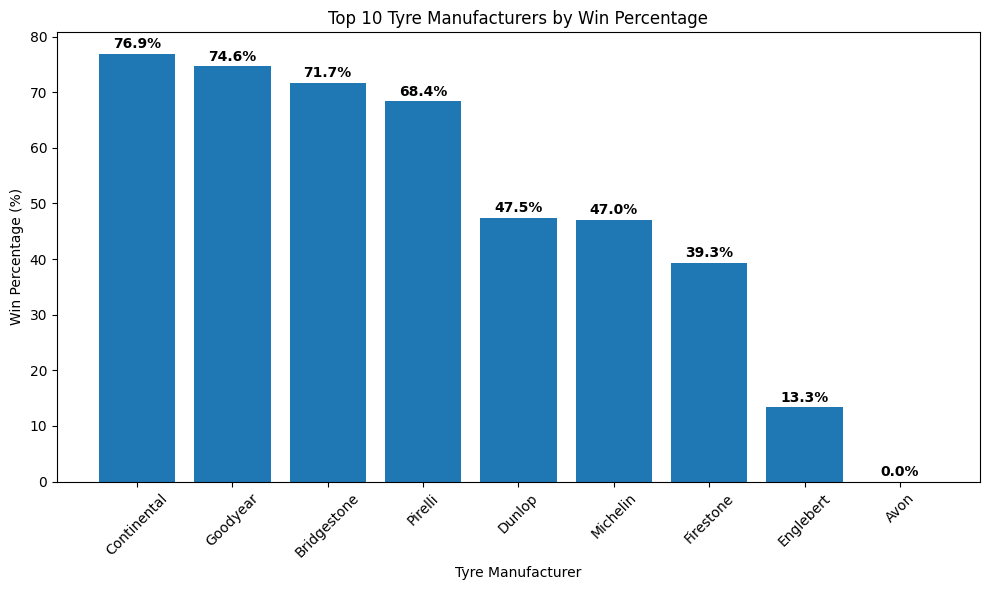

In [66]:
# Set figure size (similar to Ch9 plotting examples)
plt.figure(figsize=(10, 6))

# Get top 10 using nlargest() method from Chapter 8 slides
top_10_percentage = sorted_by_win_percentage.nlargest(10, 'win_percentage')

# Create bar plot (similar to Ch8 plotting examples)
bars = plt.bar(top_10_percentage['name'], top_10_percentage['win_percentage'])

# Set titles and labels (similar to Ch9 plot customization)
plt.title('Top 10 Tyre Manufacturers by Win Percentage')
plt.xlabel('Tyre Manufacturer')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels like in Ch9 examples

# Add value labels on bars with formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%',  # Format as percentage with 1 decimal
             ha='center', va='bottom', fontweight='bold')

# Adjust layout and show (standard pattern from slides)
plt.tight_layout()
plt.show()

# Simple Visualization 3: Podiums vs Wins

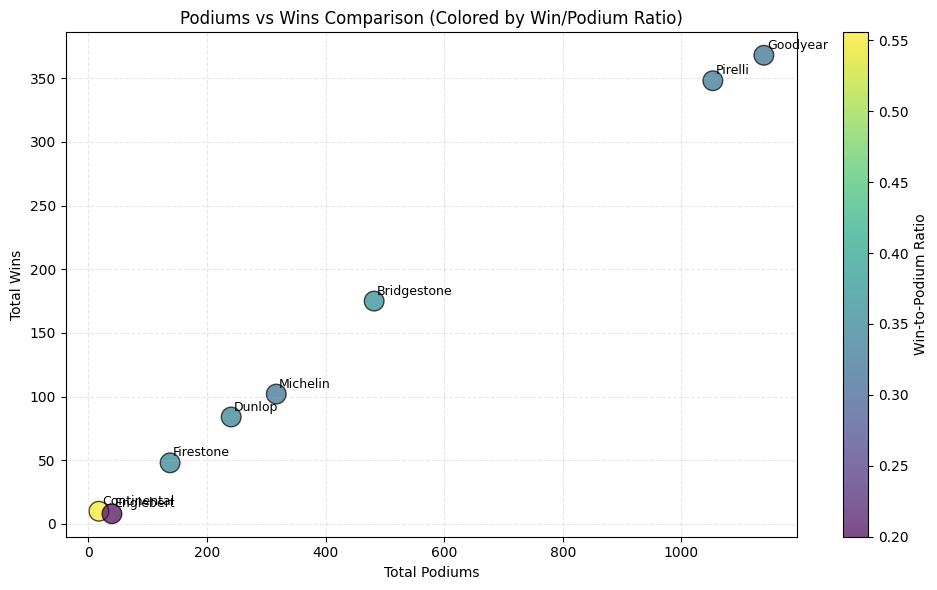

In [67]:
# Get top 8
top_8 = sorted_by_wins.nlargest(8, 'total_race_wins')

# Calculate win-to-podium ratio for coloring
top_8['win_podium_ratio'] = top_8['total_race_wins'] / top_8['total_podiums']

# Create scatter plot with color gradient
plt.figure(figsize=(10, 6))
scatter = plt.scatter(top_8['total_podiums'], top_8['total_race_wins'], 
                     s=200, alpha=0.7, 
                     c=top_8['win_podium_ratio'],  # Color by ratio
                     cmap='viridis', 
                     edgecolors='black', linewidth=1)

# Add colorbar
plt.colorbar(scatter, label='Win-to-Podium Ratio')

# Add labels for each point
for idx, row in top_8.iterrows():
    plt.text(row['total_podiums'] + 5, row['total_race_wins'] + 5, 
             row['name'], fontsize=9, fontweight='medium')

# Set titles and labels
plt.title('Podiums vs Wins Comparison (Colored by Win/Podium Ratio)')
plt.xlabel('Total Podiums')
plt.ylabel('Total Wins')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [68]:
# Calculate some summary statistics
print("=== Summary Statistics ===")
print(f"Average wins per manufacturer: {tire_data['total_race_wins'].mean():.1f}")
print(f"Average race entries per manufacturer: {tire_data['total_race_entries'].mean():.1f}")
print(f"Total wins across all manufacturers: {tire_data['total_race_wins'].sum()}")
print(f"Total race entries across all manufacturers: {tire_data['total_race_entries'].sum()}")

# Show manufacturers with perfect or near-perfect records
print("\n=== Manufacturers with High Win Rates ===")
high_win_rate = tire_data[tire_data['win_percentage'] > 50]
print(high_win_rate[['name', 'win_percentage', 'total_race_wins', 'total_race_entries']].sort_values('win_percentage', ascending=False))


=== Summary Statistics ===
Average wins per manufacturer: 127.0
Average race entries per manufacturer: 207.4
Total wins across all manufacturers: 1143
Total race entries across all manufacturers: 1867

=== Manufacturers with High Win Rates ===
          name  win_percentage  total_race_wins  total_race_entries
2  Continental       76.923077               10                  13
6     Goodyear       74.645030              368                 493
1  Bridgestone       71.721311              175                 244
8      Pirelli       68.369352              348                 509
